## Baridi RFM Model

### Model mechanics (The how?)
RFM model analyses customer behavior using three dimensions
  1. Recency (R): How recent customer has made a purchase
  2. Frequency (F): How often customer makes a purchase/subscribe within a time period
  3. Monetary (M): How much money a customer spends within a time period

### Importance of the model (The why?)
RFM model is an importat tool which can aid BaridiBaridi to underpin the behavior of her customers, which can be an intelligible way of serving segments of customer, improved customer satisfication and productivity by the CS team.

We will also use the model to create another Customer LTV model (Customer Lifetime Value), to predict future behavior of the customers.

### How this model is built

Within the Baridi Baridi database, We've transactions table as a sources from which we can havest the necessary to construct the RFM - Model.

In [62]:
import pandas as pd
from datetime import datetime

In [63]:
df = pd.read_csv('transactions_20240325.csv') # Transactions are extracted as of 2024-03-25
extraction_date = datetime.strptime('2024-03-25', '%Y-%m-%d')

/tmp/ipykernel_328383/1391626750.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('transactions_20240325.csv') # Transactions are extracted as of 2024-03-25


In [64]:
# print some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135872 entries, 0 to 135871
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              135872 non-null  int64 
 1   trx_id          135859 non-null  object
 2   trx_type        135872 non-null  object
 3   customer_id     135872 non-null  int64 
 4   device_serial   87475 non-null   object
 5   device_model    87475 non-null   object
 6   trx_date        135872 non-null  object
 7   trx_reference   135860 non-null  object
 8   credit_amount   135872 non-null  int64 
 9   debit_amount    135872 non-null  int64 
 10  balance_amount  135872 non-null  int64 
 11  status          135872 non-null  object
 12  status_message  135872 non-null  object
dtypes: int64(5), object(8)
memory usage: 13.5+ MB


### Data Preprocessing

Let us clean our data by filtering and necessary conversions

In [65]:
print(df['trx_type'].unique())
print(df['status'].unique())

['ADD_MONEY' 'DEVICE_RECHARGE' 'MONTHLY_DEDUCTION' 'BASIC_FEE']
['PROCESSED' 'FAILED']


In [66]:
df = df[(df['trx_type'] == 'DEVICE_RECHARGE') & (df['status'] == 'PROCESSED')] # Interested in successful purchases only
df.drop(columns=['credit_amount'], inplace=True) # since purchases does not have credit amount
df.drop(columns=['id', 'trx_type', 'balance_amount', 'status', 'status_message'], inplace=True) # Drop the rest

In [67]:
df.head()

,trx_id,customer_id,device_serial,device_model,trx_date,trx_reference,debit_amount
1,788ffd63-51a2-11ec-a479-022ca9a9afd4,143,0000316,GTKW35TV16WZ,2021-11-30 05:57:00,1day plan,2800
4,feba84d0-51b8-11ec-a479-022ca9a9afd4,23,0000120,GTKW50TV16VZ,2021-11-30 08:39:00,7days plan,14000
11,36e76f28-51d8-11ec-a479-022ca9a9afd4,158,0000174,GTKW60TV16UZ,2021-11-30 12:22:00,7days plan,16000
19,07faf2c9-53b7-11ec-a479-022ca9a9afd4,143,0000316,GTKW35TV16WZ,2021-12-02 21:30:00,1day plan,2800
27,25626240-55b8-11ec-a479-022ca9a9afd4,28,0000102,GTKW50TV16VZ,2021-12-05 10:43:00,1day plan,3400


In [68]:
# Are there any mistakes in terms of payments?
df['debit_amount'].describe()

count     66826.000000
mean      15514.266902
std       21663.873676
min           0.000000
25%        3500.000000
50%        4200.000000
75%       17000.000000
max      105000.000000
Name: debit_amount, dtype: float64

In [69]:
# Which transactions are 0??? and which ones are 105000
df[df['debit_amount'] == 0]

,trx_id,customer_id,device_serial,device_model,trx_date,trx_reference,debit_amount
70406,2e560dde-197a-11ee-8af2-023c2dd0f27a,179,0000172,GTKW35TV16WZ,2023-07-03 08:18:25,2 years,0
70431,615c6cb6-1983-11ee-8af2-023c2dd0f27a,179,0000172,GTKW35TV16WZ,2023-07-03 09:24:16,2 years,0
70534,1397999c-1b06-11ee-8af2-023c2dd0f27a,179,0000172,GTKW35TV16WZ,2023-07-05 07:32:21,2 years,0
70535,852730ff-1b06-11ee-8af2-023c2dd0f27a,179,0000172,GTKW35TV16WZ,2023-07-05 07:35:31,2 years,0
73158,cc883e41-2ae5-11ee-9df6-0213549ab56a,1007,0000172,GTKW35TV16WZ,2023-07-25 12:21:36,0 Year,0
73176,3d568e20-2af0-11ee-9df6-0213549ab56a,1007,0000172,GTKW35TV16WZ,2023-07-25 13:36:20,1 Year,0
73226,352b4a64-2b84-11ee-9df6-0213549ab56a,1007,0000172,GTKW35TV16WZ,2023-07-26 07:15:32,1 Year,0
73272,09488bde-2bb1-11ee-9df6-0213549ab56a,1007,0000172,GTKW35TV16WZ,2023-07-26 12:36:26,0 Year,0
73276,4552dabc-2bb1-11ee-9df6-0213549ab56a,1007,0000172,GTKW35TV16WZ,2023-07-26 12:38:07,0 Year,0
73277,9a332f2b-2bb1-11ee-9df6-0213549ab56a,1007,0000172,GTKW35TV16WZ,2023-07-26 12:40:29,0 Year,0


In [70]:
# Those transactions are invalid. Let us look into trx_reference
df['trx_reference'].unique()

array(['1day plan', '7days plan', '30days plan', '1 Day plan',
       '30 Days plan', '7 Days plan', '2 years', '0 Year', '1 Year',
       '7 Days plan\n', '30 Days plan\n'], dtype=object)

In [71]:
# There are alot of errors (Typos). Let us correct
df['trx_reference'] = df['trx_reference'].replace({
    '1day plan': '1d',
    '7days plan': '7d',
    '30days plan': '30d',
    '1 Day plan': '1d',
    '7 Days plan\n': '7d',
    '7 Days plan': '7d',
    '30 Days plan\n': '30d',
    '30 Days plan': '30d'
})

# Remove everything else
df = df[df['trx_reference'].isin(['1d', '7d', '30d'])]

In [72]:
df.head()

,trx_id,customer_id,device_serial,device_model,trx_date,trx_reference,debit_amount
1,788ffd63-51a2-11ec-a479-022ca9a9afd4,143,0000316,GTKW35TV16WZ,2021-11-30 05:57:00,1d,2800
4,feba84d0-51b8-11ec-a479-022ca9a9afd4,23,0000120,GTKW50TV16VZ,2021-11-30 08:39:00,7d,14000
11,36e76f28-51d8-11ec-a479-022ca9a9afd4,158,0000174,GTKW60TV16UZ,2021-11-30 12:22:00,7d,16000
19,07faf2c9-53b7-11ec-a479-022ca9a9afd4,143,0000316,GTKW35TV16WZ,2021-12-02 21:30:00,1d,2800
27,25626240-55b8-11ec-a479-022ca9a9afd4,28,0000102,GTKW50TV16VZ,2021-12-05 10:43:00,1d,3400


#### Correct some errors

In [76]:
# Device serials needs to be 7 digits which are zero filled. Otherwise, they'll be considered as different transaction
# from the same customer
df['device_serial'] = df['device_serial'].str.zfill(7)

#### Conversion of data types

In this section we're going to convert types

In [77]:
# Extract the number of days from the trx_reference string and convert to integer
df['Subscription_Days'] = df['trx_reference'].str.extract('(\d+)').astype(int)

In [78]:
df['trx_date'] = pd.to_datetime(df['trx_date'], format='ISO8601')

In [79]:
df.shape

(66806, 8)

## Creating the Model

Now we're somewhat confident our data is clean enough. Let us commence by creating the model.

### Aggregation

We're going to aggregate R,F,M parameters per customer per device because the nature of business allows customer to own multiple assets simultatenously.

In [80]:
df['Recency'] = (extraction_date - df['trx_date']).dt.days

In [81]:
df.head()

,trx_id,customer_id,device_serial,device_model,trx_date,trx_reference,debit_amount,Subscription_Days,Recency
1,788ffd63-51a2-11ec-a479-022ca9a9afd4,143,0000316,GTKW35TV16WZ,2021-11-30 05:57:00,1d,2800,1,845
4,feba84d0-51b8-11ec-a479-022ca9a9afd4,23,0000120,GTKW50TV16VZ,2021-11-30 08:39:00,7d,14000,7,845
11,36e76f28-51d8-11ec-a479-022ca9a9afd4,158,0000174,GTKW60TV16UZ,2021-11-30 12:22:00,7d,16000,7,845
19,07faf2c9-53b7-11ec-a479-022ca9a9afd4,143,0000316,GTKW35TV16WZ,2021-12-02 21:30:00,1d,2800,1,843
27,25626240-55b8-11ec-a479-022ca9a9afd4,28,0000102,GTKW50TV16VZ,2021-12-05 10:43:00,1d,3400,1,840


In [82]:
# Adjusting the initial aggregation to include the first transaction date
rfm_df = df.groupby(['customer_id', 'device_serial']).agg({
    'trx_date': ['max', 'min'],
    'Subscription_Days': 'sum',
    'debit_amount': 'sum'
}).reset_index()

# Renaming columns for clarity
rfm_df.columns = [
    'customer_id',
    'device_serial',
    'Last_Purchase_Date',
    'First_Purchase_Date',
    'Frequency',
    'Monetary'
]

# Calculating Recency, Tenure, and adjusting Monetary to be an average
rfm_df['Recency'] = (extraction_date - rfm_df['Last_Purchase_Date']).dt.days
rfm_df['Tenure'] = (rfm_df['Last_Purchase_Date'] - rfm_df['First_Purchase_Date']).dt.days + 1  # +1 to include the first day

In [83]:
rfm_df

,customer_id,device_serial,Last_Purchase_Date,First_Purchase_Date,Frequency,Monetary,Recency,Tenure
0,22,0000104,2021-08-28 10:57:00.000,2021-04-16 12:38:00.000,44,159200,939,134
1,23,0000109,2022-09-05 19:59:15.000,2022-02-07 13:16:00.000,217,620000,566,211
2,23,0000120,2022-02-07 12:56:00.000,2021-04-27 15:51:00.000,288,784300,776,286
3,23,0000244,2024-03-07 17:09:17.353,2022-09-09 07:40:20.000,524,2318100,17,546
4,23,0000440,2024-03-05 07:03:15.602,2023-12-04 10:26:16.051,42,109400,19,92
...,...,...,...,...,...,...,...,...
1922,1554,0000896,2024-03-07 09:05:23.713,2024-03-07 08:42:24.567,31,73900,17,1
1923,1556,0000535,2024-03-08 14:39:01.352,2024-03-07 10:47:20.150,2,7000,16,2
1924,1558,0000948,2024-03-08 07:48:08.305,2024-03-08 06:40:18.188,31,73900,16,1
1925,1561,0000241,2024-03-08 15:57:22.533,2024-03-08 15:57:22.533,1,4900,16,1


### Segmentation

We're going to segment the -RFM- parameters into using the Ranges (q1, q2 aka median and q3 aka IQR). later on we'll assign meaningful labels to the resulted segments.

In [89]:
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

In [90]:
quantiles

{'Recency': {0.25: 29.0, 0.5: 117.0, 0.75: 366.0},
 'Frequency': {0.25: 42.0, 0.5: 153.0, 0.75: 365.0},
 'Monetary': {0.25: 101500.0, 0.5: 358200.0, 0.75: 769800.0}}

##### Interlude

*Based on the quartiles you've seen, what is the significance of 0.75 range?*


*Why does the q1 ranges smaller for each of the parameter?*


*Comment on a customer who has scored q1 for each parameter*

### Quatization

We will now assign RFM score to the records in our `rfm_df` dataframe object

In [91]:
# Functions to assign scores based on quartiles
def r_score(x, p='Recency'):
    # In R score, the lower values are better since they reflect recency - ACTIVE engagement
    if x <= quantiles[p][0.25]:
        return 4
    elif x <= quantiles[p][0.5]:
        return 3
    elif x <= quantiles[p][0.75]:
        return 2
    else:
        return 1
        
def fm_score(x, p):
    if x <= quantiles[p][0.25]:
        return 1
    elif x <= quantiles[p][0.5]:
        return 2
    elif x <= quantiles[p][0.75]:
        return 3
    else:
        return 4

rfm_df['R'] = rfm_df['Recency'].apply(lambda x: r_score(x, 'Recency'))
rfm_df['F'] = rfm_df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm_df['M'] = rfm_df['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [92]:
rfm_df['RFM_Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

In [93]:
rfm_df.head()

,customer_id,device_serial,Last_Purchase_Date,First_Purchase_Date,Frequency,Monetary,Recency,Tenure,R,F,M,RFM_Score
0,22,0000104,2021-08-28 10:57:00.000,2021-04-16 12:38:00.000,44,159200,939,134,1,2,2,122
1,23,0000109,2022-09-05 19:59:15.000,2022-02-07 13:16:00.000,217,620000,566,211,1,3,3,133
2,23,0000120,2022-02-07 12:56:00.000,2021-04-27 15:51:00.000,288,784300,776,286,1,3,4,134
3,23,0000244,2024-03-07 17:09:17.353,2022-09-09 07:40:20.000,524,2318100,17,546,4,4,4,444
4,23,0000440,2024-03-05 07:03:15.602,2023-12-04 10:26:16.051,42,109400,19,92,4,1,2,412


### Labeling

Let us provide labels to our `RFM_Score` to create a new column `RFM_Segment` which will be used for analysis

In [94]:
def assign_rfm_label(row):
    # Bad customers, Missed opportunity
    if row['Recency'] >= 90:
        if row['M'] >= 3 and row['F'] == 4:
            return 'Missed Opportunity'
        if row['F'] >= 3:
            return "Cannot Loose"
        else:
            return 'Bad Customer'
    
    # High Value: Recent, frequent, and high spenders.
    if row['R'] == 4 and row['F'] == 4 and row['M'] >= 3:
        return 'High Value Customer'
    
    # Loyal Customers: Long-term customers with consistent purchases.
    elif row['F'] == 4 and row['Tenure'] > 365:
        return 'Loyal Customer'
    
    # Newly Acquired: Recently started purchasing with high frequency and/or spending.
    elif row['Tenure'] <= 365 and row['R'] == 4:
        if row['F'] >= 3 or row['M'] >= 3:
            return 'Newly Acquired'
        else:
            return 'Promising'
    
    # At Risk: Customers with long tenure but low recency scores.
    elif row['Tenure'] > 365 and row['R'] <= 2:
        return 'At Risk'
    
    # Reactivated: Customers with a long gap who made recent purchases.
    elif row['R'] == 4 and (row['Recency'] - row['Tenure']) > 180:
        return 'Reactivated Customer'
    
    # Promising: Customers with moderate to high frequency and recent transactions.
    elif row['R'] >= 3 and row['F'] >= 2:
        return 'Promising'
    
    # Need Attention: Low frequency and recent transactions but long-term customers.
    elif row['Tenure'] > 365 and row['F'] <= 2:
        return 'Need Attention'
    
    # Slipping Customers: Once frequent, now less engaged.
    elif row['F'] <= 2 and row['R'] <= 2 and row['Tenure'] > 180:
        return 'Slipping Customer'
    
    # Default category for those who don't fit into the above segments
    return 'Casual'


In [95]:
# Assuming rfm_df is your DataFrame with the RFM scores and ranks
rfm_df['RFM_Segment'] = rfm_df.apply(assign_rfm_label, axis=1)

In [96]:
rfm_df

,customer_id,device_serial,Last_Purchase_Date,First_Purchase_Date,Frequency,Monetary,Recency,Tenure,R,F,M,RFM_Score,RFM_Segment
0,22,0000104,2021-08-28 10:57:00.000,2021-04-16 12:38:00.000,44,159200,939,134,1,2,2,122,Bad Customer
1,23,0000109,2022-09-05 19:59:15.000,2022-02-07 13:16:00.000,217,620000,566,211,1,3,3,133,Cannot Loose
2,23,0000120,2022-02-07 12:56:00.000,2021-04-27 15:51:00.000,288,784300,776,286,1,3,4,134,Cannot Loose
3,23,0000244,2024-03-07 17:09:17.353,2022-09-09 07:40:20.000,524,2318100,17,546,4,4,4,444,High Value Customer
4,23,0000440,2024-03-05 07:03:15.602,2023-12-04 10:26:16.051,42,109400,19,92,4,1,2,412,Promising
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,1554,0000896,2024-03-07 09:05:23.713,2024-03-07 08:42:24.567,31,73900,17,1,4,1,1,411,Promising
1923,1556,0000535,2024-03-08 14:39:01.352,2024-03-07 10:47:20.150,2,7000,16,2,4,1,1,411,Promising
1924,1558,0000948,2024-03-08 07:48:08.305,2024-03-08 06:40:18.188,31,73900,16,1,4,1,1,411,Promising
1925,1561,0000241,2024-03-08 15:57:22.533,2024-03-08 15:57:22.533,1,4900,16,1,4,1,1,411,Promising


In [97]:
segment_counts = (rfm_df['RFM_Segment'].value_counts() / rfm_df.shape[0]).reset_index() # Relative frequency
segment_counts.columns = ['Segment', 'Counts']
segment_counts = segment_counts.sort_values(by='Counts', ascending=False)  # Optional: sort by counts

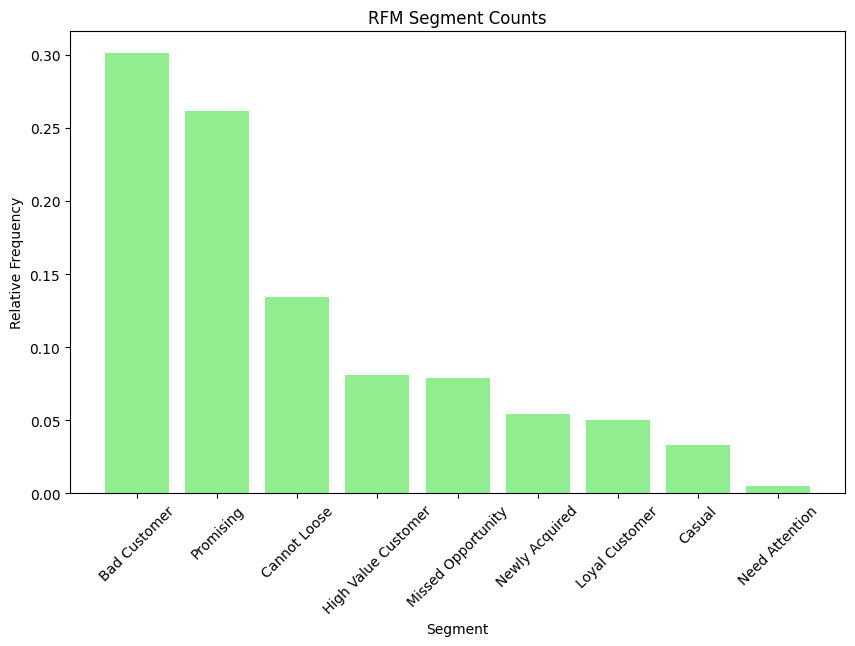

In [98]:
import matplotlib.pyplot as plt

# Set the figure size and plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(segment_counts['Segment'], segment_counts['Counts'], color='lightgreen')

plt.title('RFM Segment Counts')
plt.xlabel('Segment')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

#### Interlude

*What is the percentage of customers who are at risk? NOTE: Some of these customers have had asset uninstalled. So the relative frequencies depict the whole course-line of the business history*

In [107]:
# Customers who are about to sleep

rfm_df[(rfm_df['customer_id'] == 23) & (rfm_df['device_serial'] == '0000109')]

,customer_id,device_serial,Last_Purchase_Date,First_Purchase_Date,Frequency,Monetary,Recency,Tenure,R,F,M,RFM_Score,RFM_Segment
1,23,0000109,2022-09-05 19:59:15,2022-02-07 13:16:00,217,620000,566,211,1,3,3,133,Cannot Loose


### CS Assignment

Customer success should focus on the following customer who at risk but has recharged recently.

In [105]:
rfm_df[rfm_df['RFM_Segment'] == 'Bad Customer']

,customer_id,device_serial,Last_Purchase_Date,First_Purchase_Date,Frequency,Monetary,Recency,Tenure,R,F,M,RFM_Score,RFM_Segment
0,22,0000104,2021-08-28 10:57:00.000,2021-04-16 12:38:00.000,44,159200,939,134,1,2,2,122,Bad Customer
6,27,0000103,2021-08-10 06:49:00.000,2021-05-07 11:54:00.000,14,46200,957,95,1,1,1,111,Bad Customer
7,27,0000123,2021-12-24 05:19:00.000,2021-05-10 13:52:00.000,132,474000,821,228,1,2,3,123,Bad Customer
9,28,0000631,2023-11-28 10:18:08.245,2023-04-25 10:25:10.000,54,133000,117,217,3,2,2,322,Bad Customer
10,31,0000001,2021-05-25 15:01:00.000,2021-05-25 15:01:00.000,1,3500,1034,1,1,1,1,111,Bad Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,1192,0000515,2023-11-29 12:54:31.451,2023-11-29 12:54:31.451,1,3500,116,1,3,1,1,311,Bad Customer
1775,1194,0000546,2023-11-30 09:17:48.664,2023-11-30 09:17:48.664,1,3500,115,1,3,1,1,311,Bad Customer
1800,1231,0000300,2023-12-15 08:50:40.084,2023-12-14 08:06:38.716,31,63200,100,2,3,1,1,311,Bad Customer
1804,1240,0000559,2023-12-19 08:47:36.306,2023-12-19 08:47:36.306,1,4900,96,1,3,1,1,311,Bad Customer


In [101]:
# This customer had a tenure of 725 days, and recharged 580 days. But unistallation was performed.
rfm_df[rfm_df['customer_id'] == 25]

,customer_id,device_serial,Last_Purchase_Date,First_Purchase_Date,Frequency,Monetary,Recency,Tenure,R,F,M,RFM_Score,RFM_Segment
5,25,0000114,2023-04-24 13:17:01,2021-04-30 07:08:00,580,1264500,335,725,2,4,4,244,Missed Opportunity


In [112]:
admit_labels = ['Promising', 'Missed Opportunity', 'Cannot Loose', 'Loyal Customer', 'High Value Customer']
targets_df = rfm_df[['customer_id', 'device_serial', 'RFM_Segment']]

# Remove new and casual customers
targets_df = targets_df[~targets_df['RFM_Segment'].isin(['Newly Acquired', 'Casual'])]

targets_df.loc[targets_df['RFM_Segment'].isin(admit_labels), 'Decision'] = 'ADMIT'
targets_df.loc[~targets_df['RFM_Segment'].isin(admit_labels), 'Decision'] = 'NONADMIT'

In [113]:
targets_df

,customer_id,device_serial,RFM_Segment,Decision
0,22,0000104,Bad Customer,NONADMIT
1,23,0000109,Cannot Loose,ADMIT
2,23,0000120,Cannot Loose,ADMIT
3,23,0000244,High Value Customer,ADMIT
4,23,0000440,Promising,ADMIT
...,...,...,...,...
1922,1554,0000896,Promising,ADMIT
1923,1556,0000535,Promising,ADMIT
1924,1558,0000948,Promising,ADMIT
1925,1561,0000241,Promising,ADMIT


In [114]:
targets_df[targets_df['Decision'] == 'NONADMIT']

,customer_id,device_serial,RFM_Segment,Decision
0,22,0000104,Bad Customer,NONADMIT
6,27,0000103,Bad Customer,NONADMIT
7,27,0000123,Bad Customer,NONADMIT
9,28,0000631,Bad Customer,NONADMIT
10,31,0000001,Bad Customer,NONADMIT
...,...,...,...,...
1773,1192,0000515,Bad Customer,NONADMIT
1775,1194,0000546,Bad Customer,NONADMIT
1800,1231,0000300,Bad Customer,NONADMIT
1804,1240,0000559,Bad Customer,NONADMIT


In [117]:
targets_df = targets_df[targets_df['customer_id'] != 179]
targets_df[['customer_id', 'device_serial', 'Decision']].to_csv('RF_Labels.csv')